In [59]:
import torch
import torchvision.transforms as T
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

In [60]:
# Load pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [61]:
# Load class labels for COCO dataset
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella',
    'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet',
    'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [99]:
# Load an image
image_path = "/content/4.jpg"
image = Image.open(image_path)

In [100]:
# Transform the image
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

In [101]:
# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

In [102]:
# Get detected objects
boxes = predictions[0]['boxes'].numpy()  # Bounding boxes
labels = predictions[0]['labels'].numpy()  # Class labels
scores = predictions[0]['scores'].numpy()  # Confidence scores

In [103]:
# Load image with OpenCV
image_cv = cv2.imread(image_path)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

In [104]:
# Draw detected objects on the image
for i in range(len(boxes)):
    if scores[i] > 0.9:  # Confidence threshold
        x1, y1, x2, y2 = boxes[i].astype(int)
        label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
        score = scores[i]

        # Draw bounding box
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_cv, f"{label} {score:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

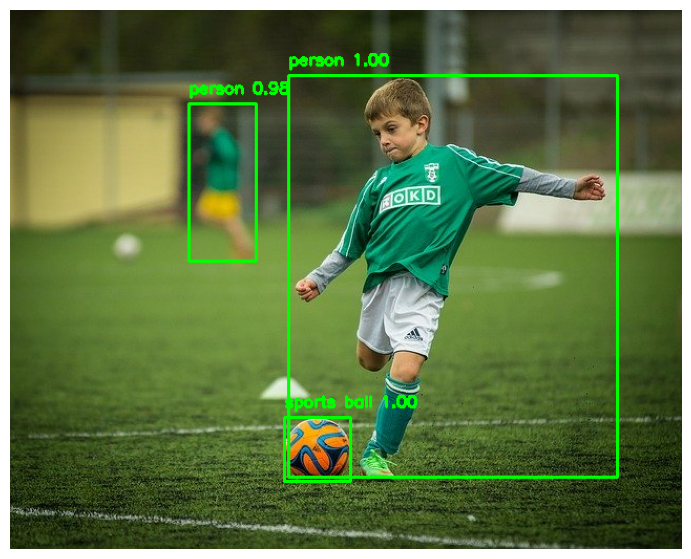

In [105]:
# Show the image
plt.figure(figsize=(10, 7))
plt.imshow(image_cv)
plt.axis("off")
plt.show()